# Réseau convolutif

Objectif : construction d'un réseau convolutif simple avec Keras. 
De nombreuses possibilités d'amélioration :
- optimisation du nombre de couches / noyaux / activations
- architecture
- régularisation
- ...

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Input, Dense, Activation,Lambda,Flatten,Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam


# Données

On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)

x_train = x_train.reshape(num_examples, img_size, img_size, 1)/255
x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 1)/255

print('Taille de la rétine : ',num_input)
print("Nombre d'exemples : ",num_examples)

# Conversion en matrices binaires
y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)


Taille de la rétine :  784
Nombre d'exemples :  60000


# Définition du réseau

## Paramètres

In [3]:
lr = 0.001
num_epochs = 25
batch_size = 128
dropout = 0.75 # ici probabilité de garder le neurone

## Types de couches

## Modèle du réseau construit 
CONV1-RELU-MAX POOLING - CONV2-RELU-MAX POOLING-FCL-Dropout-Prediction

In [4]:
#TODO
model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(dropout))

model.add(Dense(10, activation='softmax'))
model.summary()

/Users/neil/miniconda3/envs/AI_ML/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-07 16:42:29.034002: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-10-07 16:42:29.034034: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-07 16:42:29.034040: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-07 16:42:29.034060: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-07 16:42:29.034073: I tensorflow/core/common_runtime/pluggable_device/pluggable_devic

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,111,946 (4.24 MB)

 Trainable params: 1,111,946 (4.24 MB)

 Non-trainable params: 0 (0.00 B)

## Fonction de coût et optimisation

In [5]:
#TODO
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr), metrics=['acc'])


# Entraînement du réseau

In [7]:
#TODO

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/25


2024-10-07 16:42:43.016278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - acc: 0.8503 - loss: 0.4717 - val_acc: 0.9876 - val_loss: 0.0376
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - acc: 0.9797 - loss: 0.0663 - val_acc: 0.9903 - val_loss: 0.0275
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9874 - loss: 0.0431 - val_acc: 0.9916 - val_loss: 0.0257
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - acc: 0.9888 - loss: 0.0364 - val_acc: 0.9924 - val_loss: 0.0254
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9923 - loss: 0.0266 - val_acc: 0.9901 - val_loss: 0.0308
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - acc: 0.9928 - loss: 0.0226 - val_acc: 0.9930 - val_loss: 0.0220
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9927 - loss: 0.0213 - val_acc: 0.9931 - val_loss: 0.0207
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9947 - loss: 0.0165 - val_acc: 0.9941 - val_loss: 0.0200
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - acc

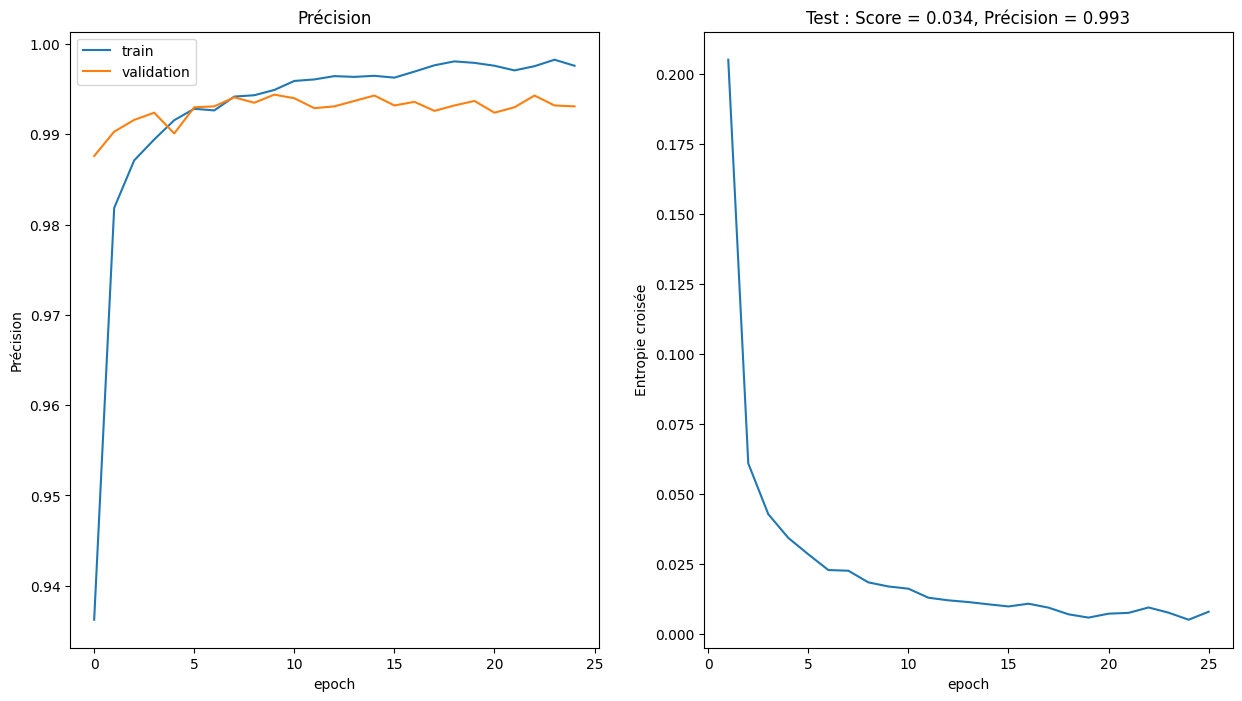

<Figure size 640x480 with 0 Axes>

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Précision')
plt.ylabel('Précision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

plt.subplot(1,2,2)
x = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.xlabel('epoch')
plt.ylabel('Entropie croisée')
plt.title("Test : Score = {0:5.3f}, Précision = {1:5.3f}".format(score[0], score[1]))
plt.plot(x,l)
plt.show()
plt.tight_layout()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Nombre d'erreurs 69/10000




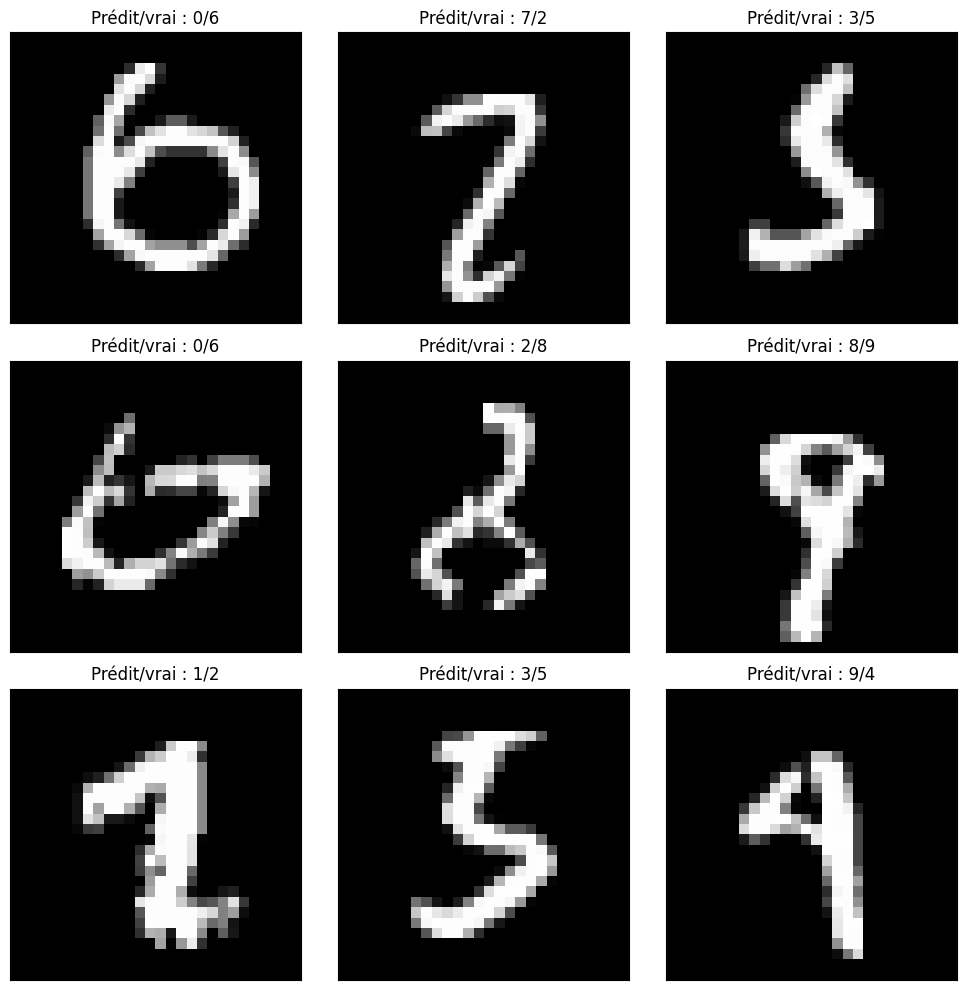

In [9]:
predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y = np.argmax(y_test,axis=1)

incorrects = np.nonzero(predicted_classes != y)[0]
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrects[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Prédit/vrai : {}/{}".format(predicted_classes[incorrects[i]], y[incorrects[i]]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
print("Nombre d'erreurs {}/{}\n\n".format(incorrects.size,y.size))
